In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn import linear_model, cross_validation
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
from get_clean_data import get_data, clean_data

In [3]:
prelim_df = get_data()

In [4]:
X_clean, y_clean = clean_data(prelim_df, True)

<h3>Clip funded status to 400%, divide EIR by 100 if > 100 <br>
    Only look at info for ptp count < 10000 for now </h3>

In [5]:
X_lin = X_clean[['sb_tot_partcp_cnt', 'sb_eff_int_rate_prcnt', 'sb_pr_yr_fndng_prcnt']]

In [6]:
X_lin['sb_pr_yr_fndng_prcnt'] = np.clip(X_lin['sb_pr_yr_fndng_prcnt'],0,400)
#X_lin['sb_eff_int_rate_prcnt'] = np.where(X_lin['sb_eff_int_rate_prcnt'] > 100, X_lin['sb_eff_int_rate_prcnt'] / 100, X_lin['sb_eff_int_rate_prcnt'])

In [8]:
X = X_lin[X_lin['sb_tot_partcp_cnt'] < 1000]
y = y_clean[X_lin['sb_tot_partcp_cnt'] < 1000]

<h2>Fit a simple linear regression</h2>
<br>Use K-Fold Cross Validation

In [ ]:
scaler = StandardScaler()

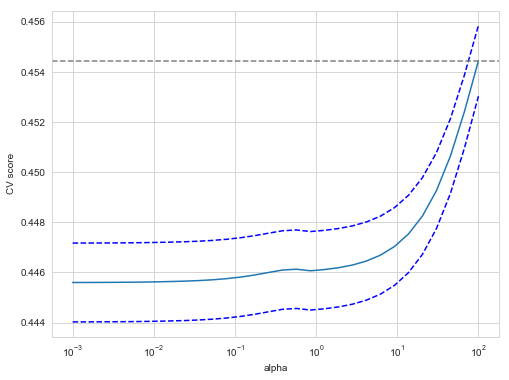

In [11]:
lasso = linear_model.Lasso()
alphas = np.logspace(-3, 2, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    #scaler.fit(X)
    #scaler.transform(X)
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs=-1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.figure(figsize=(8, 6))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)), 'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)), 'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.show()

<h1>Make Pipeline</h1>

In [ ]:
lin_model = make_pipeline()